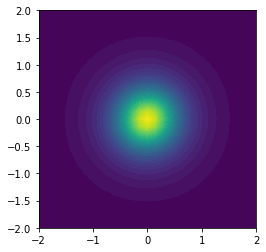

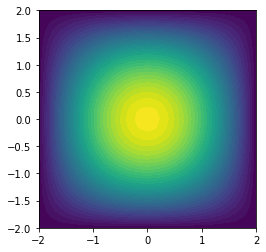

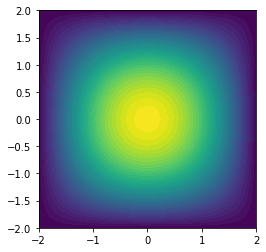

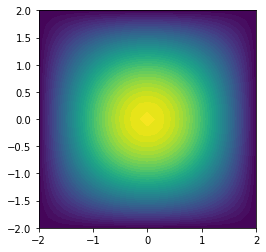

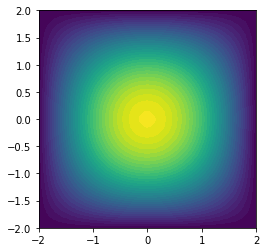

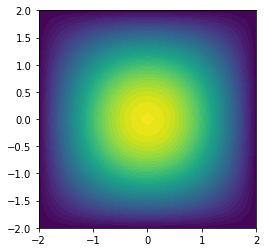

In [18]:
# Solving the 2D heat equation with FEniCSx

from fenics import *
import numpy as np
import matplotlib.pyplot as plt

T = 10.0            # final time
num_steps = 50     # number of time steps
dt = T / num_steps # time step size

# define mesh and function space
nx = ny = 30
mesh = RectangleMesh(Point(-2, -2), Point(2, 2), nx, ny)
V = FunctionSpace(mesh, "P", 1)

# boundary condition
# check if we're on the mesh boundary
def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, Constant(0), boundary)

# initial condition: gaussian hill
u_0 = Expression("exp(-a*pow(x[0], 2) - a*pow(x[1], 2))",
                degree=2, a=5)
u_n = interpolate(u_0, V)

# define trial and test functions
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(0)

# get FEniCS to create a weak form for us
F = u*v*dx + dt*dot(grad(u), grad(v))*dx - (u_n + dt*f)*v*dx
a, L = lhs(F), rhs(F)

# Update over time
u = Function(V)
t = 0
for n in range(num_steps):
    t += dt
    
    # Solve vatiational problem
    solve(a == L, u, bc)
    
    plot(u)
    if n % 10 == 0:
        plt.show()
        
    # Update previous solution
    u_n.assign(u)
    